In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import metrics

%matplotlib inline

In [216]:
train = pd.read_csv('C:/Users/1-11/Jupyter/04_Titanic/titanic_train.csv')

In [217]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [218]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [219]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


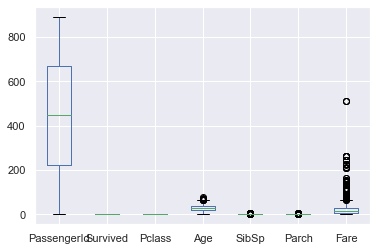

In [220]:
train.boxplot()

In [221]:
for col in train.columns:
    print(str(col), train[col].isnull().sum()/train.shape[0], "%")

PassengerId 0.0 %
Survived 0.0 %
Pclass 0.0 %
Name 0.0 %
Sex 0.0 %
Age 0.19865319865319866 %
SibSp 0.0 %
Parch 0.0 %
Ticket 0.0 %
Fare 0.0 %
Cabin 0.7710437710437711 %
Embarked 0.002244668911335578 %


In [222]:
sns.set()

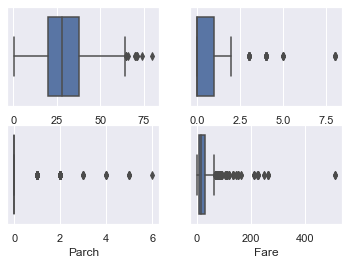

In [223]:
fig, ax = plt.subplots(2,2)
sns.boxplot(train['Age'], ax=ax[0,0])
sns.boxplot(train['SibSp'], ax=ax[0,1])
sns.boxplot(train['Parch'], ax=ax[1,0])
sns.boxplot(train['Fare'], ax=ax[1,1])

In [224]:
from collections import Counter
# by) Tukey Method 를 사용, 수치 데이터 아웃라이어가 2개 이상 발생 시 해당
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        # 1st quartile(25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile(75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range(IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col]<Q1-outlier_step) | (df[col]>Q3+outlier_step)].index
        
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    
    return multiple_outliers

In [225]:
Outliers_to_drop = detect_outliers(train,2,['Age','SibSp','Parch','Fare'])

C:\Users\1-11\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [226]:
Outliers_to_drop

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [227]:
train.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [228]:
train = train.drop(Outliers_to_drop, axis=0).reset_index(drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null int64
Name           881 non-null object
Sex            881 non-null object
Age            711 non-null float64
SibSp          881 non-null int64
Parch          881 non-null int64
Ticket         881 non-null object
Fare           881 non-null float64
Cabin          201 non-null object
Embarked       879 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


# Feature Analysis

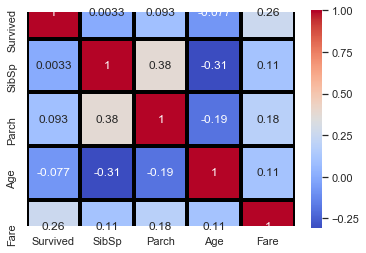

In [229]:
sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare']].corr(), annot=True, cmap='coolwarm',
           linewidth=3, linecolor='black',fmt='.2g', square=True)

## 위의 나머지 변수들에 대해서 하나씩 확인을 해보면서 Survived와 관계를 좀 알아보자!

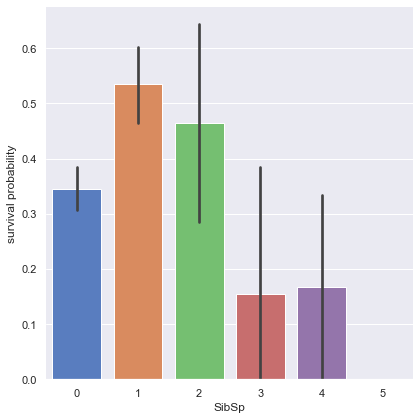

In [230]:
s = sns.catplot(x='SibSp', y='Survived', data=train, kind='bar', height=6, palette='muted')
s.despine(left=True)
s = s.set_ylabels('survival probability')

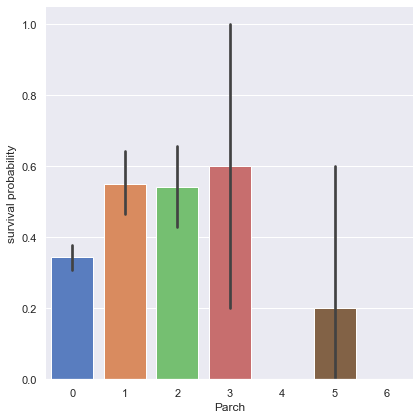

In [231]:
p = sns.catplot(x='Parch', y='Survived', data=train, kind='bar', height=6, palette='muted')
p.despine(left=True)
p = p.set_ylabels('survival probability')

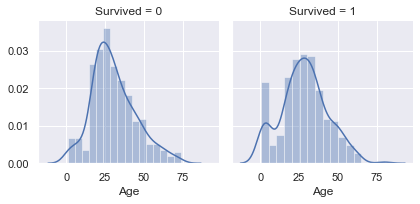

In [232]:
a = sns.FacetGrid(train, col='Survived')
a = a.map(sns.distplot, 'Age')

In [233]:
train.loc[:, ['Survived', 'Age']].corr()

,Survived,Age
Survived,1.000000,-0.076867
Age,-0.076867,1.000000


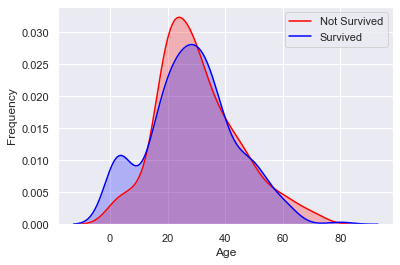

In [234]:
g = sns.kdeplot(train['Age'][(train['Survived']==0) & (train['Age'].notnull())],
               color='Red', shade=True)
g = sns.kdeplot(train['Age'][(train['Survived']==1) & (train['Age'].notnull())],
               color='Blue', shade=True)
g.set_xlabel('Age')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived','Survived'])

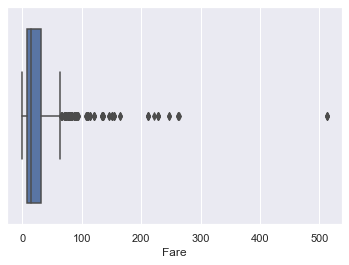

In [235]:
sns.boxplot(train['Fare'])

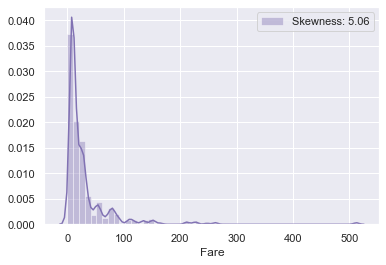

In [236]:
ax = sns.distplot(train['Fare'], color='m', label='Skewness: %.2f'%(train['Fare'].skew()))
ax = ax.legend(loc='best')

In [237]:
train['Fare'] = train['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)

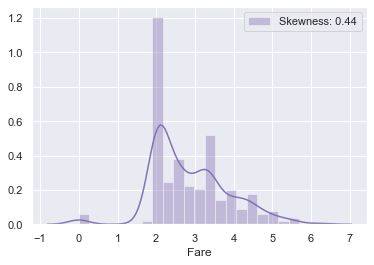

In [238]:
ax = sns.distplot(train['Fare'], color='m', label='Skewness: %.2f'%(train['Fare'].skew()))
ax = ax.legend(loc='best')

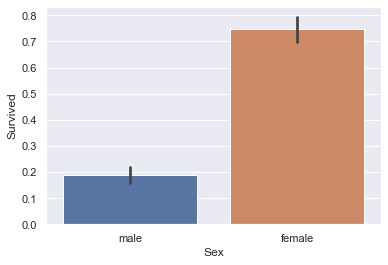

In [239]:
sns.barplot(x=train['Sex'], y=train['Survived'])

In [240]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


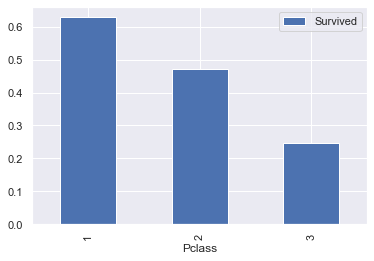

In [241]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

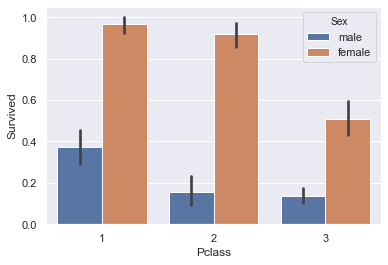

In [242]:
sns.barplot(x=train['Pclass'], y=train['Survived'], hue='Sex', data=train)

In [243]:
print('Embarked 빠진 데이터 수 : {0}'.format(train['Embarked'].isnull().sum()))

Embarked 빠진 데이터 수 : 2


In [244]:
train['Embarked'].value_counts()

S    634
C    168
Q     77
Name: Embarked, dtype: int64

In [245]:
train['Embarked'] = train['Embarked'].fillna('S')

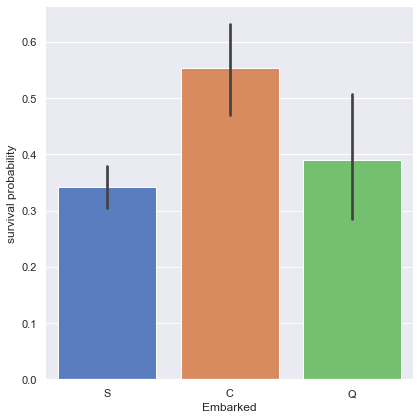

In [246]:
g = sns.catplot(x='Embarked', y='Survived', data=train, height=6, kind='bar', palette='muted').despine(left=True)
g.set_ylabels('survival probability')

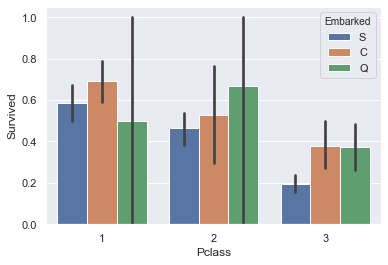

In [247]:
sns.barplot(x=train['Pclass'], y=train['Survived'], hue='Embarked', data=train)

In [248]:
train['Age'].isnull().sum()

170

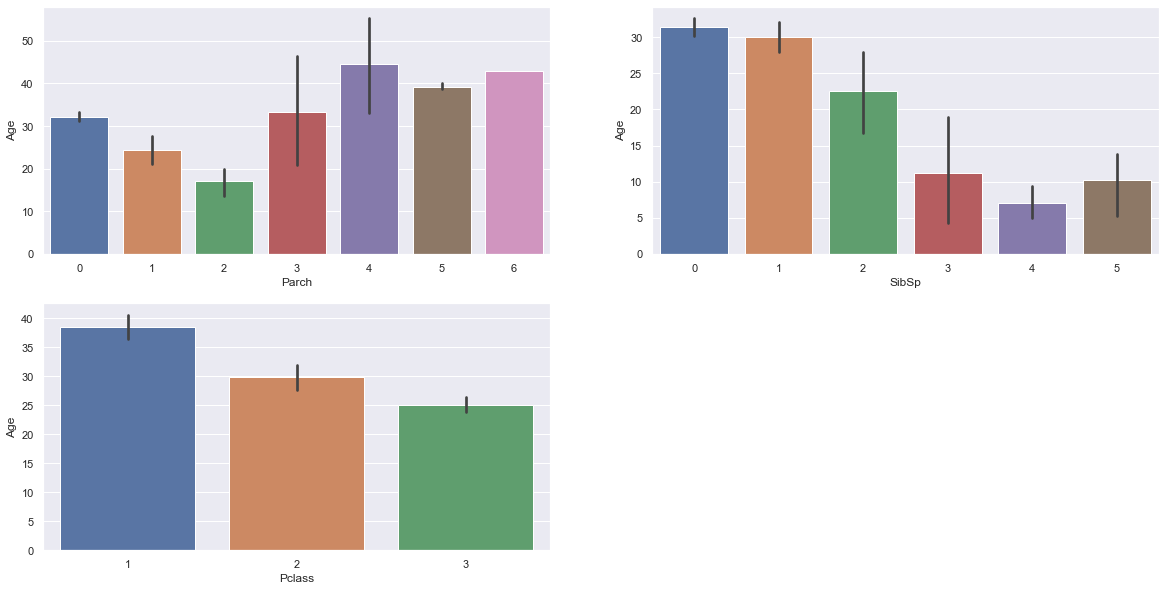

In [249]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot = sns.barplot(y='Age', x='Parch', data=train)
plt.subplot(2,2,2)
plt.plot = sns.barplot(y='Age', x='SibSp', data=train)
plt.subplot(2,2,3)
plt.plot = sns.barplot(y='Age', x='Pclass', data=train)
plt.show()

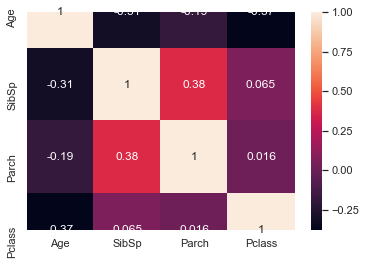

In [250]:
fig, ax = plt.subplots(nrows=1, ncols=1)
sns.heatmap(train.loc[:,['Age','Sex','SibSp','Parch','Pclass']].corr(), annot=True, ax=ax)

In [251]:
index_NaN_age = list(train['Age'][train['Age'].isnull()].index)

age_idx = train.columns.get_loc('Age')
sibsp_idx = train.columns.get_loc('SibSp')
parch_idx = train.columns.get_loc('Parch')
pclass_idx = train.columns.get_loc('Pclass')

for i in index_NaN_age:
    age_med = train['Age'].median()
    age_pred = train['Age'][((train['SibSp']==train.iloc[i]['SibSp'])
                            & (train['Parch']==train.iloc[i]['Parch'])
                            & (train['Pclass']==train.iloc[i]['Pclass']))].median()
    if not np.isnan(age_pred):
        train.iat[i, age_idx] = age_pred
    else:
        train.iat[i, age_idx] = age_med

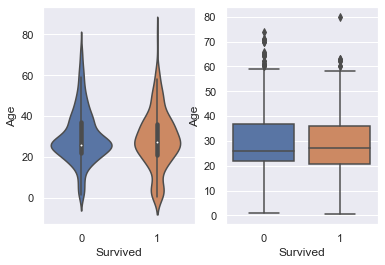

In [252]:
plt.subplot(1,2,1)
plt.plot = sns.violinplot(x='Survived', y='Age', data=train, kind='violin')
plt.subplot(1,2,2)
plt.plot = sns.boxplot(x='Survived', y='Age', data=train)

In [253]:
train['Cabin'].describe()

count         201
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [254]:
train['Cabin'].isnull().sum()

680

In [255]:
train['Cabin'] = train['Cabin'].fillna('X')
train['Cabin'] = train['Cabin'].apply(lambda x: str(x)[:1])

train['Cabin'].isnull().sum()

0

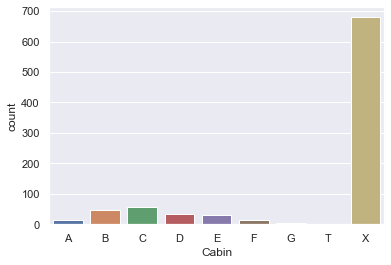

In [256]:
sns.countplot(train['Cabin'], order=['A','B','C','D','E','F','G','T','X'])

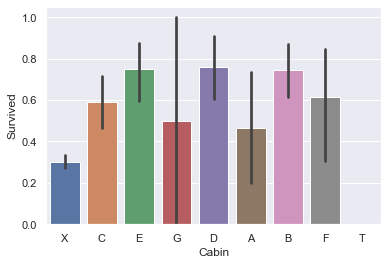

In [257]:
sns.barplot(y='Survived', x='Cabin', data=train)

## 새로운 지표 만들기

In [258]:
train['Fsize'] = train['SibSp'] + train['Parch'] + 1

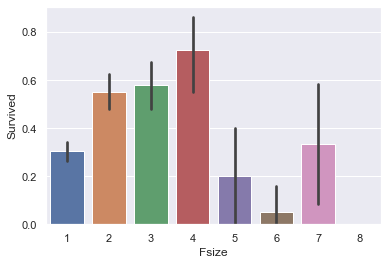

In [259]:
sns.barplot(x='Fsize', y='Survived', data=train)

In [260]:
train['Single'] = train['Fsize'].apply(lambda x: 1 if x==1 else 0)
train['SmallF'] = train['Fsize'].apply(lambda x: 1 if x==2 else 0)
train['MedF'] = train['Fsize'].apply(lambda x: 1 if 3 <= x <= 4 else 0)
train['LargeF'] = train['Fsize'].apply(lambda x: 1 if x>=5 else 0)

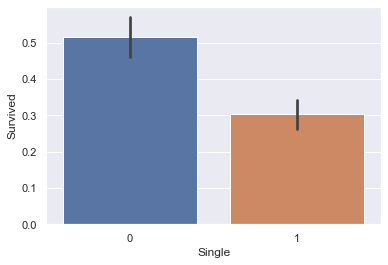

In [261]:
sns.barplot(x='Single', y='Survived', data=train)

## 전처리

In [262]:
from sklearn import preprocessing

In [263]:
def titanic_fillna(df):
    # 앞에서 해결
    return df

In [264]:
def drop_feature(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

In [265]:
def format_features(df):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df.loc[:,feature])
        df.loc[:,feature] = le.transform(df.loc[:,feature])
    
    # Scalar 사용할 수 있음
    return df

In [266]:
def titanic_transform(df):
    df = titanic_fillna(df)
    df = drop_feature(df)
    df = format_features(df)
    return df

In [267]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fsize,Single,SmallF,MedF,LargeF
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,X,S,2,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C,C,2,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,X,S,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C,S,2,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,X,S,1,1,0,0,0


In [268]:
X_titanic_train = titanic_transform(train)
X_titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fsize,Single,SmallF,MedF,LargeF
0,0,3,1,22.0,1,0,1.981001,8,2,2,0,1,0,0
1,1,1,0,38.0,1,0,4.266662,2,0,2,0,1,0,0
2,1,3,0,26.0,0,0,2.070022,8,2,1,1,0,0,0
3,1,1,0,35.0,1,0,3.972177,2,2,2,0,1,0,0
4,0,3,1,35.0,0,0,2.085672,8,2,1,1,0,0,0


In [269]:
y_titanic_train = X_titanic_train.iloc[:,0]
X_titanic_train =X_titanic_train.iloc[:,1:]

In [274]:
X_titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fsize,Single,SmallF,MedF,LargeF
0,3,1,22.0,1,0,1.981001,8,2,2,0,1,0,0
1,1,0,38.0,1,0,4.266662,2,0,2,0,1,0,0
2,3,0,26.0,0,0,2.070022,8,2,1,1,0,0,0
3,1,0,35.0,1,0,3.972177,2,2,2,0,1,0,0
4,3,1,35.0,0,0,2.085672,8,2,1,1,0,0,0


In [275]:
y_titanic_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [270]:
from sklearn.model_selection import train_test_split

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_train, 
                                                    y_titanic_train, 
                                                    stratify = y_titanic_train,
                                                    test_size=0.3, 
                                                    random_state=1234)

In [337]:
from sklearn.model_selection import KFold

In [338]:
# shuffle는 순서에 대해서도 섞에서 랜덤하게..
kfold = KFold(n_splits=5, random_state= 0, shuffle = True)

In [339]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 평가용
from sklearn.metrics import accuracy_score

- knn으로 간단히 확인

In [404]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [405]:
knn = KNeighborsClassifier()

In [406]:
scores = cross_val_score(knn, X_train, y_train, cv=kfold)

for iter_count, accuracy in enumerate(scores):
    print("knn 교차 검증 {0} & 정확도 {1:.4f}".format(iter_count, accuracy))
print("------------------------------")

print("knn 교차 검증 평균 정확도 : {0:.4f}".format(scores.mean()))

knn 교차 검증 0 & 정확도 0.6855
knn 교차 검증 1 & 정확도 0.7561
knn 교차 검증 2 & 정확도 0.7480
knn 교차 검증 3 & 정확도 0.6585
knn 교차 검증 4 & 정확도 0.7561
------------------------------
knn 교차 검증 평균 정확도 : 0.7208


In [407]:
parameters = {
    'n_neighbors':[1,3,5,7],
    'weights':['uniform']
}

In [408]:
n_iter_search = 10
knn_rgs = RandomizedSearchCV(knn, param_distributions=parameters, cv=5, scoring='accuracy',
                            n_jobs=-1, verbose=1, random_state=1234, n_iter=n_iter_search)

knn_rgs.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\1-11\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.3s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 3, 5, 7],
                                        'weights': ['uniform']},
                   pre_dispatch='2*n_jobs', random_state=1234, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [409]:
knn_rgs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [410]:
parameters = {
    'n_neighbors':[3,5,7],
    'weights':['uniform']
}

In [411]:
grid_knn_clf = GridSearchCV(knn, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [412]:
grid_knn_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7], 'weights': ['uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [413]:
grid_knn_clf.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [414]:
grid_knn_clf.best_score_

0.7337662337662337

In [415]:
knn_best = grid_knn_clf.best_estimator_

knn_predictions = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, knn_predictions)
print("knn에서 GridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy))

knn에서 GridSearchCV로 찾은 결과 : 0.7245


- random forest

In [416]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [417]:
RF = RandomForestClassifier(n_jobs=-1, random_state=1234)

In [418]:
scores = cross_val_score(RF, X_train, y_train, cv=kfold)

for iter_count, accuracy in enumerate(scores):
    print("RF 교차 검증 {0} & 정확도 {1:.4f}".format(iter_count, accuracy))
print("------------------------------")

print("RF 교차 검증 평균 정확도 : {0:.4f}".format(scores.mean()))

C:\Users\1-11\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\1-11\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\1-11\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\1-11\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\1-11\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

RF 교차 검증 0 & 정확도 0.8065
RF 교차 검증 1 & 정확도 0.8293
RF 교차 검증 2 & 정확도 0.8455
RF 교차 검증 3 & 정확도 0.7724
RF 교차 검증 4 & 정확도 0.7561
------------------------------
RF 교차 검증 평균 정확도 : 0.8019


In [419]:
X_train.shape

(616, 13)

In [420]:
parameters = {
    'n_estimators':[10,100,200,300,400,500],
    'max_features': np.arange(1,5)
}

In [421]:
n_iter_search = 10
RF_rgs = RandomizedSearchCV(RF, param_distributions=parameters, cv=kfold, scoring='accuracy',
                            n_jobs=-1, verbose=1, random_state=1234, n_iter=n_iter_search)

RF_rgs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.1s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn'

In [422]:
RF_rgs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [423]:
parameters = {
    'n_estimators':[40,50,60],
    'max_features': [4]
}

In [424]:
grid_RF_clf = GridSearchCV(RF, param_grid=parameters, scoring='accuracy', cv=kfold, n_jobs=-1)

In [425]:
grid_RF_clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=1234, verbose=0,
                        

In [426]:
grid_RF_clf.best_params_

{'max_features': 4, 'n_estimators': 50}

In [427]:
grid_RF_clf.best_score_

0.810064935064935

In [428]:
RF_best = grid_RF_clf.best_estimator_

RF_predictions = RF_best.predict(X_test)
accuracy = accuracy_score(y_test, RF_predictions)
print("RF에서 GridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy))

RF에서 GridSearchCV로 찾은 결과 : 0.8415


- SVM

In [429]:
from sklearn.svm import SVC
from sklearn import metrics

In [430]:
svm_model = SVC()

In [431]:
scores = cross_val_score(svm_model, X_train, y_train, cv=kfold)

for iter_count, accuracy in enumerate(scores):
    print("svm_model 교차 검증 {0} & 정확도 {1:.4f}".format(iter_count, accuracy))
print("------------------------------")

print("svm_model 교차 검증 평균 정확도 : {0:.4f}".format(scores.mean()))

svm_model 교차 검증 0 & 정확도 0.7581
svm_model 교차 검증 1 & 정확도 0.7967
svm_model 교차 검증 2 & 정확도 0.7073
svm_model 교차 검증 3 & 정확도 0.7073
svm_model 교차 검증 4 & 정확도 0.7724
------------------------------
svm_model 교차 검증 평균 정확도 : 0.7484


C:\Users\1-11\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\1-11\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\1-11\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\1-11\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

In [432]:
parameters = {
    'C': [0.8,1,1.2], 'kernel':['linear']
}

In [433]:
n_iter_search = 10
svm_model_rgs = RandomizedSearchCV(svm_model, param_distributions=parameters, cv=kfold, scoring='accuracy',
                            n_jobs=-1, verbose=1, random_state=1234, n_iter=n_iter_search)

svm_model_rgs.fit(X_train, y_train)

C:\Users\1-11\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.4s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.8, 1, 1.2],
                                        'kernel': ['linear']},
                   pre_dispatch='2*n_jobs', random_state=1234, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [434]:
svm_model_rgs.best_estimator_

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [435]:
parameters = {
   'C': [0.7,0.8,0.9], 'kernel':['linear']
}

In [436]:
grid_svm_model_clf = GridSearchCV(svm_model, param_grid=parameters, scoring='accuracy', cv=kfold, n_jobs=-1)

In [437]:
grid_svm_model_clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.7, 0.8, 0.9], 'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [438]:
grid_svm_model_clf.best_params_

{'C': 0.7, 'kernel': 'linear'}

In [439]:
grid_svm_model_clf.best_score_

0.7938311688311688

In [440]:
svm_model_best = grid_svm_model_clf.best_estimator_

svm_model_predictions = svm_model_best.predict(X_test)
accuracy = accuracy_score(y_test, svm_model_predictions)
print("svm_model에서 GridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy))

svm_model에서 GridSearchCV로 찾은 결과 : 0.8264


In [441]:
import xgboost as xgb
from xgboost import XGBClassifier

In [442]:
XGBC = XGBClassifier(verbosity=2, n_jobs=-1, random_state=1234)

xgbc_param_grid = {
    'n_estimators' : [20,50,70,150,250,300],
    'learning_rate' : (np.arange(0.1,1,0.05)),
    'max_depth' : [3,4,5,6,7]
}

In [443]:
n_iter_search = 10
xgb_rgs = RandomizedSearchCV(XGBC, param_distributions=xgbc_param_grid, cv=kfold, scoring='accuracy',
                            n_jobs=-1, verbose=1, random_state=1234, n_iter=n_iter_search)

xgb_rgs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[14:44:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:44:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:44:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:44:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:44:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:44:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:44:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:44:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:44:41] INFO: src/tree/updater_prune.cc:74: tree prun

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.4s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=2),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate':

In [444]:
xgb_rgs_best = xgb_rgs.best_estimator_
print(xgb_rgs_best)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.40000000000000013, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=2)


In [445]:
xgbc_param_grid = {
    'n_estimators' : [10,15,20,25,30],
    'learning_rate' : [0.645,0.65,0.655],
    'max_depth' : [1,2,3,4,5]
}

In [446]:
xgb_gs = GridSearchCV(XGBC, param_grid=xgbc_param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)

In [447]:
xgb_gs.fit(X_train, y_train)

[14:44:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:44:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:44:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:44:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:44:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:44:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:44:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[14:44:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:44:43] INFO: src/tree/updater_prune.cc:74: tree prun

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=1234, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=2),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.645, 0.65, 0.655],
     

In [448]:
xgb_gs.best_params_

{'learning_rate': 0.645, 'max_depth': 3, 'n_estimators': 10}

In [449]:
xgb_gs.best_score_

0.8295454545454546

In [450]:
xgb_best = xgb_gs.best_estimator_

xgb_predictions = xgb_best.predict(X_test)
accuracy = accuracy_score(y_test, xgb_predictions)
print("xgb에서 GridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy))

xgb에서 GridSearchCV로 찾은 결과 : 0.8453


In [451]:
from lightgbm import LGBMClassifier

In [452]:
LGB = LGBMClassifier(n_jobs=-1, random_state=1234)

lb_param_grid = {
    'n_estimators' : [100,200,300],
    'learning_rate' : [0.1,0.05,0.01],
    'max_depth' : [-1],
    'min_child_weight' : [13],
    'colsample_bytree' : [0.1,0.3,0.5,0.7,0.9],
    'num_leaves' : [6,8,12,16,20,24],
    'reg_lambda' : [1,1.6,2,2.6,10],
    'reg_alpha'  : [1,1.2,0.5],
    'subsample' : [0.7,0.8,0.9,1.0]
}

In [453]:
n_iter_search = 10
lgb_rgs = RandomizedSearchCV(LGB, param_distributions=lb_param_grid, cv=kfold, scoring='accuracy',
                            n_jobs=-1, verbose=1, random_state=1234, n_iter=n_iter_search)

lgb_rgs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, object...
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.5, 0.7,
                                                             0.9],
                                        'learnin

In [454]:
lgb_rgs_best = lgb_rgs.best_estimator_
print(lgb_rgs_best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=13, min_split_gain=0.0,
               n_estimators=300, n_jobs=-1, num_leaves=24, objective=None,
               random_state=1234, reg_alpha=0.5, reg_lambda=1, silent=True,
               subsample=0.7, subsample_for_bin=200000, subsample_freq=0)


In [455]:
lb_param_grid = {
    'n_estimators' : [200,300,400],
    'learning_rate' : [0.05,0.1,0.15],
    'max_depth' : [-1],
    'min_child_weight' : [13],
    'colsample_bytree' : [0.4,0.5,0.6],
    'num_leaves' : [22,24,26],
    'reg_lambda' : [0.5,1,1.5],
    'reg_alpha'  : [0.3,0.4,0.5,0.6],
    'subsample' : [0.5,0.7,0.9]
}

In [456]:
lgb_gs = GridSearchCV(LGB, param_grid=lb_param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)

In [457]:
lgb_gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=No...
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6],
                         'learning_rate': [0.05, 0.1, 0.15], 'max_depth': [-1],
                         'min_child_weight': [13],
                         'n_estimators': [200, 300, 400],
                         'num_leaves': [22, 24, 26]

In [458]:
lgb_gs.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_weight': 13,
 'n_estimators': 400,
 'num_leaves': 22,
 'reg_alpha': 0.5,
 'reg_lambda': 1,
 'subsample': 0.5}

In [459]:
lgb_gs.best_score_

0.810064935064935

In [460]:
lgb_best = lgb_gs.best_estimator_

lgb_predictions = lgb_best.predict(X_test)
accuracy = accuracy_score(y_test, lgb_predictions)
print("lgb에서 GridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy))

lgb에서 GridSearchCV로 찾은 결과 : 0.8415


# voting

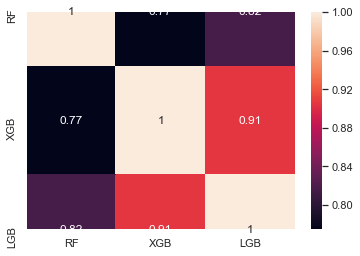

In [463]:
test_Survived_RF = pd.Series(RF_best.predict(X_test), name='RF')
test_Survived_XGB = pd.Series(xgb_best.predict(X_test), name='XGB')
test_Survived_LGB = pd.Series(lgb_best.predict(X_test), name='LGB')
ensemble_results = pd.concat([test_Survived_RF,test_Survived_XGB,test_Survived_LGB],axis=1)
sns.heatmap(ensemble_results.corr(),annot=True)

In [461]:
from sklearn.ensemble import VotingClassifier

In [464]:
eclf = VotingClassifier(estimators = [('rf', RF_best),('xgb', xgb_best),('lgb', lgb_best)],
                       voting = 'hard')

eclf.fit(X_train, y_train)
eclf_pred = eclf.predict(X_test)
accuracy = accuracy_score(y_test, eclf_pred)
print("Hard Voting 으로 찾은 결과 : {0:.4f}".format(accuracy))

[14:57:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:57:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:57:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:57:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:57:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:57:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:57:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[14:57:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:57:04] INFO: src/tree/updater_prune.cc:74: tree prun